## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Learning Curves


In [2]:
nba_data = pd.read_csv('NBA.csv')
nba_data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


## 1. Cross-Validation

In [3]:
model = LinearRegression()
X = nba_data[['mp']]
y = nba_data['win_rating']

cv_result = cross_validate(model, X, y, cv=5)
cv_score = cv_result['test_score'].mean()
cv_score

0.5567301800068911

## 2. Learning Curves

In [4]:
train_sizes = np.arange(100, 3201, 100)
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y,train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

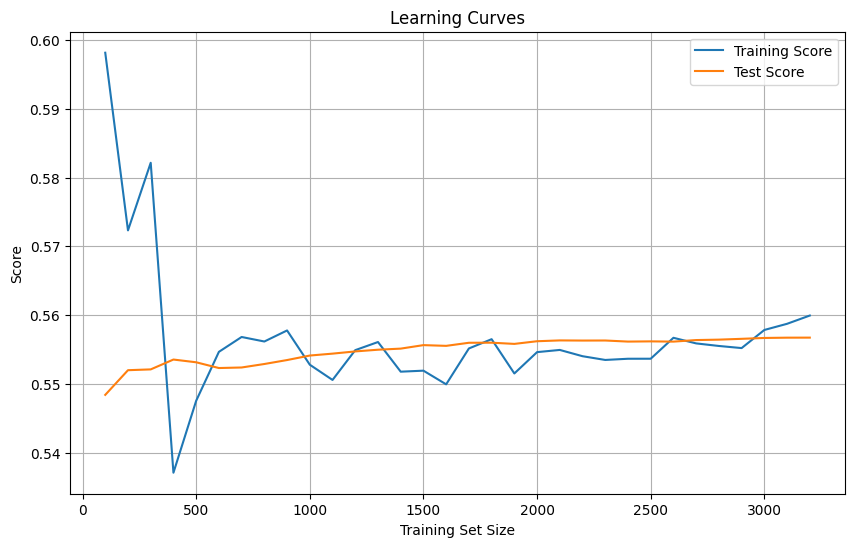

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show();

## 3. Adding Features

In [6]:
cv_result

{'fit_time': array([0.00577164, 0.00403595, 0.00400949, 0.00399423, 0.00367475]),
 'score_time': array([0.00300884, 0.00324512, 0.00303364, 0.00199986, 0.00200129]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

In [7]:
X_new = nba_data[['mp','poss', 'do_ratio', 'pacing']]
cv_added_features = cross_validate(model, X_new, y, cv=5)
score_added_features = cv_added_features['test_score'].mean()
score_added_features

0.6321354129549309

## 4. Learning Curves 2

In [8]:
train_sizes_added_features, train_scores_added_features,test_scores_added_features = learning_curve(
    estimator=LinearRegression(),
    X=X_new,
    y=y,
    train_sizes=train_sizes,
    cv=5
)

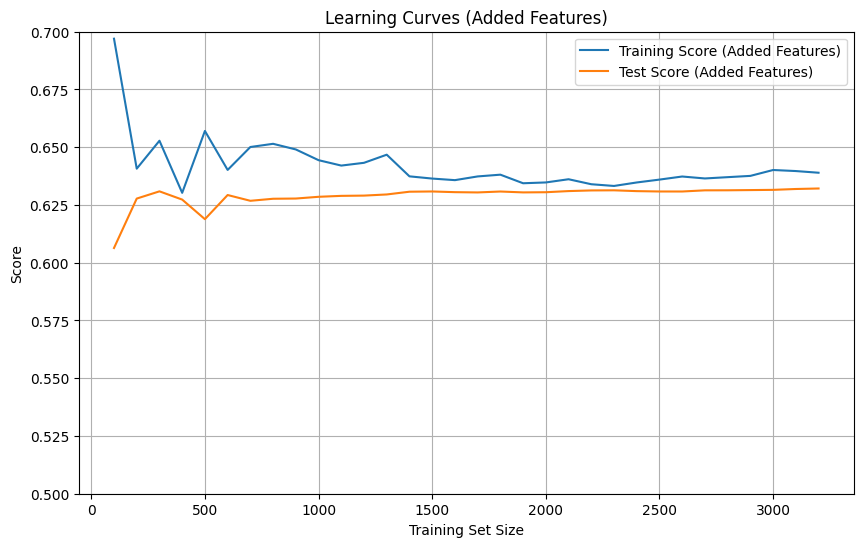

In [9]:
train_scores_mean_added_features = np.mean(train_scores_added_features, axis=1)
test_scores_mean_added_features = np.mean(test_scores_added_features, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean_added_features, label='Training Score (Added Features)')
plt.plot(train_sizes, test_scores_mean_added_features, label='Test Score (Added Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves (Added Features)')
plt.legend()
plt.grid(True)
plt.ylim(0.5, 0.7)
plt.show();

## 5. Improving Linear Model Fit with Polynomial Features

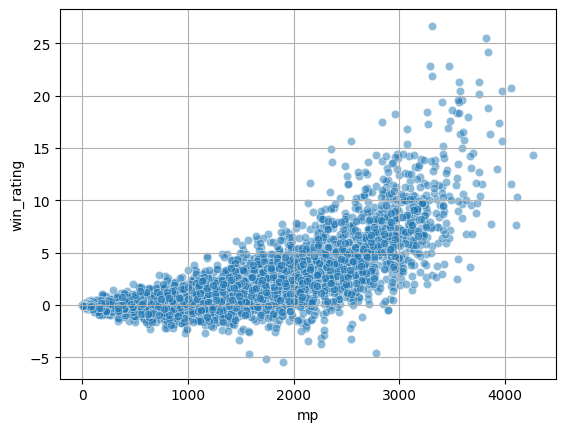

In [10]:
sns.scatterplot(data=nba_data, x='mp', y='win_rating', alpha=0.5)
plt.grid(True)
plt.show();

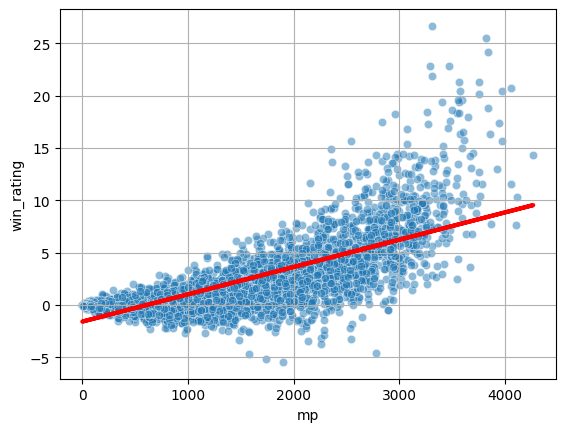

Model R2: 0.5441185829799919


In [11]:
X = nba_data[['mp']]
y = nba_data['win_rating']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

# scoring the model
lin_reg_score = model.score(X_test, y_test)

# extracting the coefficients and regression function

regression = model.coef_[0] * nba_data['mp'] + model.intercept_
# plotting the data and learned regression function

sns.scatterplot(data=nba_data, x='mp', y='win_rating', alpha=0.5)
plt.plot(nba_data['mp'], regression, color='red', linewidth=3)
plt.grid(True)
plt.show();
print('Model R2:', lin_reg_score)

In [12]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False) # we don't want to add a column of 1's
X_poly = polynomial_features.fit_transform(X)

X_poly = pd.DataFrame(X_poly) # turning it back into a DataFrame for easier manipulation
X_poly.head()

,0,1
0,2409.0,5803281.0
1,2708.0,7333264.0
2,2407.0,5793649.0
3,585.0,342225.0
4,2056.0,4227136.0


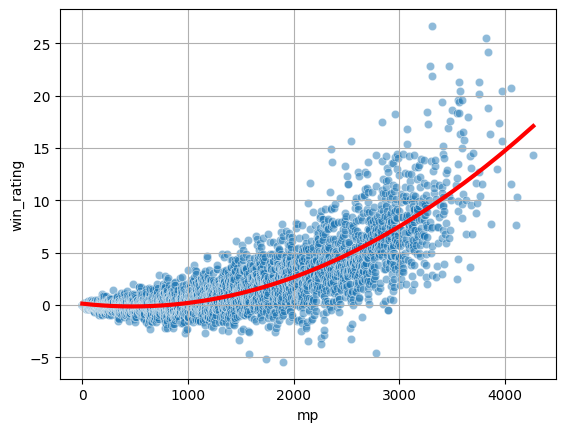

In [13]:
sorted_df = nba_data.sort_values('mp')

X_sorted = sorted_df[['mp']]
y_sorted = sorted_df['win_rating']

#creating our polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_sorted)

#fit model
model.fit(X_poly, y_sorted)

predictions = model.predict(X_poly)

#plot predictions over original data
sns.scatterplot(x=X_sorted['mp'], y=y_sorted, alpha=0.5)
plt.plot(X_sorted['mp'], predictions, linewidth=3, color='r')
plt.grid(True)
plt.show();

💡 The new regression line seems to be a better fit for our data - we're on the right track!

## 6. Picking the best number of degrees

In [14]:
X_full = nba_data[['mp', 'poss', 'do_ratio', 'pacing']]
poly_features = PolynomialFeatures(degree=2,include_bias=True)
X_poly =poly_features.fit_transform(X_full)
cv_poly = cross_validate(model, X_poly, y, cv=5)
score_poly = cv_poly['test_score'].mean()
score_poly

0.8697420123126228

In [15]:
scores = []
for i in range(1, 11):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=True)
    X_poly = polynomial_features.fit_transform(X_full)
    model = LinearRegression()
    cv_result = cross_validate(model,X_poly, y, cv=5)
    scores.append(cv_result['test_score'].mean())
scores

[0.6321354129549308,
 0.8697420123126228,
 0.8686652851906229,
 0.8231437773960872,
 0.7580963323992824,
 0.6187388702809316,
 0.1208335065446915,
 -0.6367188360406675,
 -3.057412523735822,
 -0.524032677079506]

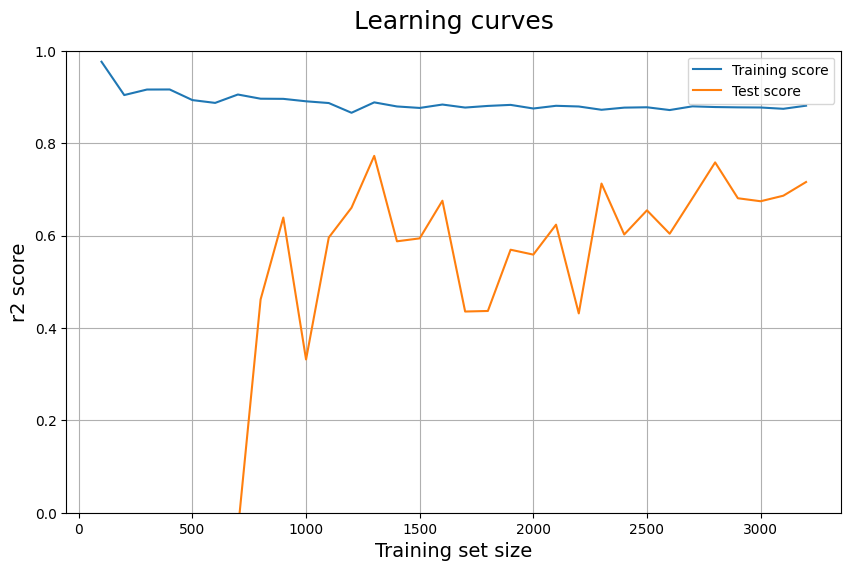

In [16]:
# Transform our X to include polynomial features
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_full)

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator = LinearRegression(),
    X = X_poly, 
    y = y, 
    train_sizes = train_sizes, 
    cv = 5
)

# Take the mean of cross-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.grid(True)
plt.ylim(0,1)
plt.legend();

## 7. Reducing Training Set Size

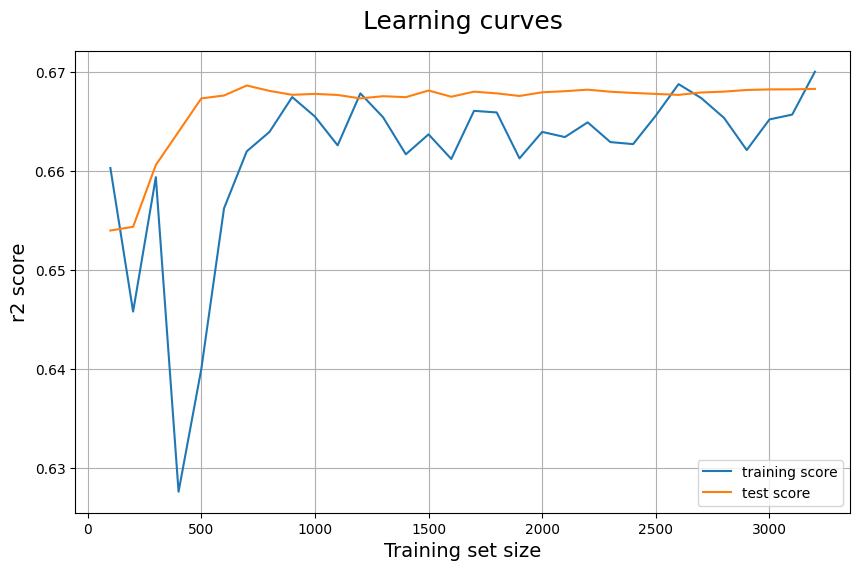

In [17]:
# create the training size slices
train_sizes = np.linspace(100, 3200, 32, dtype='int')

X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator = LinearRegression(),
    X = X_poly, 
    y = y, 
    train_sizes = train_sizes, 
    cv = 5
)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.grid(True)
plt.legend();

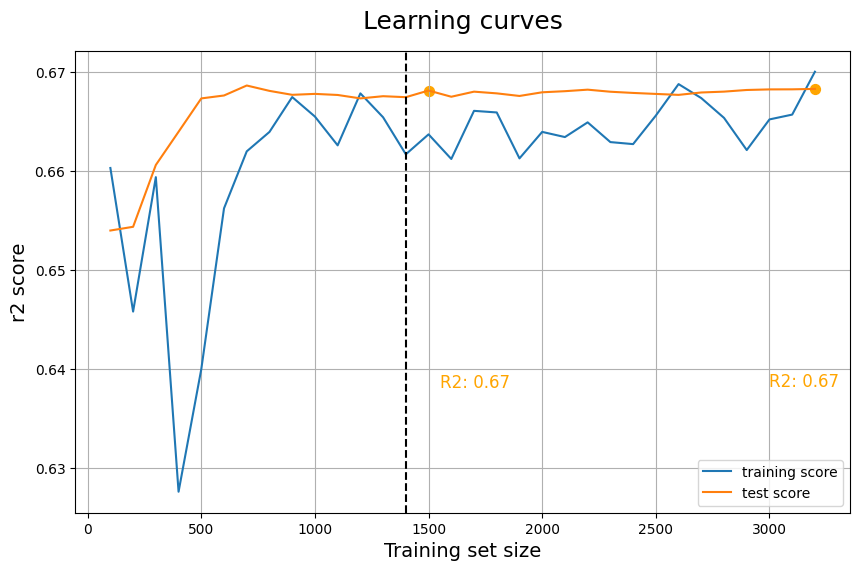

In [18]:
# Plotting the learning curves
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)

# Plotting a line where difference of train and test score becomes <1%
plt.axvline(1400, linestyle='--', c='black')
plt.annotate('Past this line:\ntrain_score - test_score <= 0.01', xy=(1450, 0.7))


# Comparing test scores at that line and at max training data (80% of data)
plt.scatter(train_sizes[14], test_scores_mean[14], c='orange', s=50)
plt.annotate(
    f"R2: {round(test_scores_mean[14], 2)}",
    xy=(train_sizes[14] + 50, test_scores_mean[14] - 0.03),
    fontsize=12, c='orange'
)

plt.scatter(train_sizes[31], test_scores_mean[31], c='orange', s=50)
plt.annotate(
    f"R2: {round(test_scores_mean[31],2)}",
    xy=(train_sizes[31] - 200, test_scores_mean[31] - 0.03),
    fontsize=12, c='orange'
)
plt.grid(True)
plt.legend();

## 8. Comparing Model Predictions

In [19]:
model_all_features = LinearRegression()
model_all_features.fit(X_full, y)
y_pred_all_features = model_all_features.predict(X_full)
reg_score = mean_squared_error(y, y_pred_all_features)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_full)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)
poly_score = mean_squared_error(y, y_pred_poly)
reg_score, poly_score

(4.360580300558266, 1.5267939788857607)